In [1]:
def remove_parentheses(ss):
    ss = np.array(ss)
    for i in range(ss.size):
        s = ss[i].split('(')
        s = s[0]
        if s[-1]==' ':
            s = s[:-1]
        ss[i] = s
    return ss

## Loading data

In [2]:
# Visualizes the location visit durations across different demographic (e.g., emplotyment) and mental health (e.g. depression)
# groups

import pickle
import os
import numpy as np
import pandas as pd

datadir = 'data'

folders = os.listdir(datadir)
folders.remove('1515656')
print('subject 1515656 skipped because of spoofed gps.')

# folders.remove('.dropbox')
# folders.remove('desktop.ini')

loc_all_subject = [[] for i in range(len(folders))]
loc_all = []
for (i,fol) in enumerate(folders):
    subfolders = os.listdir(datadir+'/'+fol)
    for subf in subfolders:
        file_eml = datadir+'/'+fol+'/'+subf+'/eml.csv'
        if os.path.exists(file_eml):
            df = pd.read_csv(file_eml, sep='\t', header=None)
            # remove extra "" and []
            loc = df.loc[0,6][2:-2]
            # disregard multiple location types
            if not('", "' in loc) and loc!='' and loc!='Vehicle':
                # remove extra space in the end
                if loc[-1]==' ':
                    loc = loc[:-1]
                # convert to titlecase
                loc = loc.title()
                # make letters after apostrophe lowercase
                if "'" in loc:
                    ind = loc.find("'")
                    loc_temp = ''
                    for (j,l) in enumerate(loc):
                        if j==ind+1:
                            loc_temp += l.lower()
                        else:
                            loc_temp += l
                    loc = loc_temp
                loc_all_subject[i].append(loc)
                loc_all.append(loc)
            
loc_uniq_subject = [[] for i in range(len(loc_all_subject))]
for i in range(len(loc_all_subject)):
    loc_uniq_subject[i] = np.unique(loc_all_subject[i])
    
loc_uniq = np.unique(loc_all)

subject 1515656 skipped because of spoofed gps.


## Overall Distribution

(-0.5, 58)

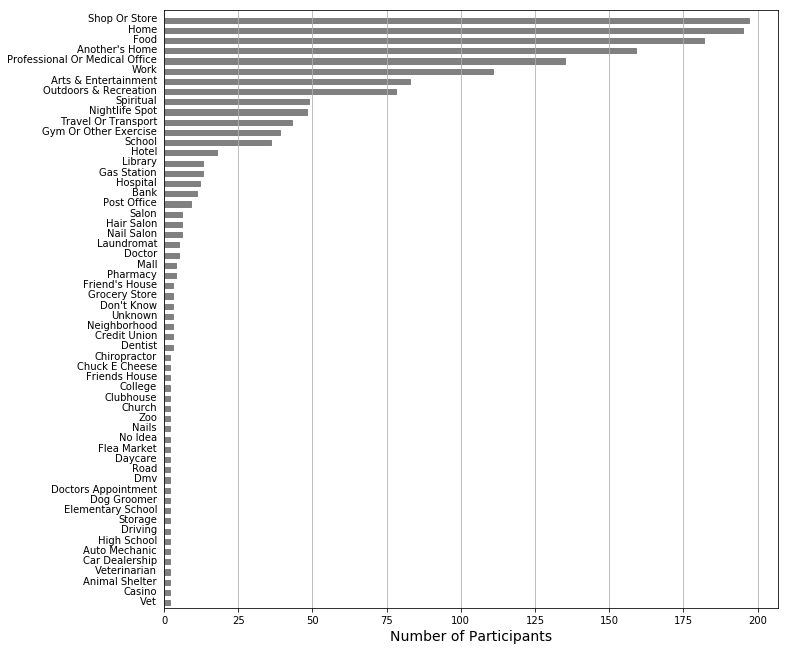

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

n = 58

loc_freq = np.zeros(loc_uniq.size)
for i in range(loc_uniq.size):
    for j in range(len(loc_uniq_subject)):
        if loc_uniq[i] in loc_uniq_subject[j]:
            loc_freq[i] += 1

ind_sort = np.argsort(loc_freq)
loc_uniq = loc_uniq[ind_sort]
loc_freq = loc_freq[ind_sort]

plt.figure(figsize=[11,11])
plt.barh(np.arange(n), loc_freq[-n:], height=.5, color=(.5,.5,.5), edgecolor=(.5,.5,.5))
plt.yticks(np.arange(n)+.25, remove_parentheses(loc_uniq[-n:]), fontsize=10);
plt.xticks(np.arange(0,201,25))
plt.xlabel('Number of Participants',fontsize=14)
plt.axes().xaxis.grid()
plt.tick_params(
    axis='y',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    right='off',      # ticks along the bottom edge are off
    left='off',         # ticks along the top edge are off
    labelbottom='on') # labels along the bottom edge are off
# plt.tight_layout()
plt.ylim([-.5,n])
# plt.savefig('distribution.png',format='png',dpi=200, pad_inches=0)

## Save top locations for classification

In [15]:
loctop = remove_parentheses(loc_uniq[-11:])
with open('top_locations.dat','wb') as f:
    pickle.dump(loctop, f)
f.close()

In [16]:
loctop

array(['Travel Or Transport', 'Nightlife Spot', 'Spiritual',
       'Outdoors & Recreation', 'Arts & Entertainment', 'Work',
       'Professional Or Medical Office', "Another's Home", 'Food', 'Home',
       'Shop Or Store'], 
      dtype='<U60')

In [3]:
loc_uniq.size

370